<a href="https://colab.research.google.com/github/TrentDodge/SQC/blob/main/A6_Ch13hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import math
import random
import scipy
import statistics
import numpy as np
import scipy.stats
from scipy.special import comb
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [40]:
data = pd.read_csv('https://raw.githubusercontent.com/TrentDodge/SQC/main/A6.%20Chap%2013.csv', sep=',', na_values=".")

In [41]:
del data['I bad']
del data['II bad']

In [42]:
data

,Run,A,B,C,D,I,II
0,1,-1,-1,-1,-1,7.037,6.376
1,a,1,-1,-1,-1,14.707,15.219
2,b,-1,1,-1,-1,11.635,12.089
3,ab,1,1,-1,-1,17.273,17.815
4,c,-1,-1,1,-1,10.403,10.151
5,ac,1,-1,1,-1,4.368,4.098
6,bc,-1,1,1,-1,9.360,9.253
7,abc,1,1,1,-1,13.440,12.923
8,d,-1,-1,-1,1,8.561,8.951
9,ad,1,-1,-1,1,16.867,17.052


In [43]:
df=data #df means data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     16 non-null     object 
 1   A       16 non-null     int64  
 2   B       16 non-null     int64  
 3   C       16 non-null     int64  
 4   D       16 non-null     int64  
 5   I       16 non-null     float64
 6   II      16 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 1.0+ KB


In [44]:
Xmain=df[['A', 'B', 'C', 'D']]
Xmain

,A,B,C,D
0,-1,-1,-1,-1
1,1,-1,-1,-1
2,-1,1,-1,-1
3,1,1,-1,-1
4,-1,-1,1,-1
5,1,-1,1,-1
6,-1,1,1,-1
7,1,1,1,-1
8,-1,-1,-1,1
9,1,-1,-1,1


In [45]:
x1x2x3x4=df['A'] * df['B'] *df['C'] * df['D']
x1x2x3x4

0     1
1    -1
2    -1
3     1
4    -1
5     1
6     1
7    -1
8    -1
9     1
10    1
11   -1
12    1
13   -1
14   -1
15    1
dtype: int64

In [46]:
xx=Xmain.to_numpy()
poly= PolynomialFeatures(degree=3, interaction_only=True)
xxpd=pd.DataFrame(poly.fit_transform(xx), columns=['I', 'x1', 'x2', 'x3', 'x4','x1x2', 'x1x3', 'x1x4', 'x2x3', 'x2x4', 'x3x4', 'x1x2x3', 'x1x2x4', 'x1x3x4','x2x3x4'])
xxpd['x1x2x3x4']=x1x2x3x4
xxpd

,I,x1,x2,x3,x4,x1x2,x1x3,x1x4,x2x3,x2x4,x3x4,x1x2x3,x1x2x4,x1x3x4,x2x3x4,x1x2x3x4
0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1
1,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1
2,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1
3,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1
4,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1
5,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1
6,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,1
7,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1
8,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1
9,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1


In [47]:
X=xxpd[['x1','x4','x1x4']]
Y=df[['I']]
regr2=LinearRegression()
regr2.fit(X,Y)
Yhat2=regr2.predict(X)
X2=xxpd[['I','x1','x4','x1x4']]
model2 = sm.OLS(Y, X2)
res2=model2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      I   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.9327
Date:                Fri, 14 Oct 2022   Prob (F-statistic):              0.455
Time:                        11:37:46   Log-Likelihood:                -43.882
No. Observations:                  16   AIC:                             95.76
Df Residuals:                      12   BIC:                             98.85
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I             12.0103      1.085     11.074      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [48]:
X = df[['A', 'B', 'C', 'D']]

In [49]:
Y=df[['I']]
Y

,I
0,7.037
1,14.707
2,11.635
3,17.273
4,10.403
5,4.368
6,9.360
7,13.440
8,8.561
9,16.867


In [50]:
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      I   R-squared (uncentered):                   0.064
Model:                            OLS   Adj. R-squared (uncentered):             -0.248
Method:                 Least Squares   F-statistic:                             0.2041
Date:                Fri, 14 Oct 2022   Prob (F-statistic):                       0.931
Time:                        11:37:48   Log-Likelihood:                         -62.860
No. Observations:                  16   AIC:                                      133.7
Df Residuals:                      12   BIC:                                      136.8
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [51]:
res.resid

0      9.850125
1     14.476500
2     10.406000
3     13.000375
4     16.640500
5      7.561875
6     11.555375
7     12.591750
8      9.409250
9     14.671625
10    10.682125
11    13.586500
12    16.118625
13     7.354000
14    11.420500
15    12.839875
dtype: float64

In [52]:
eij=res.resid
eij

0      9.850125
1     14.476500
2     10.406000
3     13.000375
4     16.640500
5      7.561875
6     11.555375
7     12.591750
8      9.409250
9     14.671625
10    10.682125
11    13.586500
12    16.118625
13     7.354000
14    11.420500
15    12.839875
dtype: float64

In [53]:
N = len(eij)
c = list(range(0, N))
order = random.sample(c, N) # this should be replaced by the exact run order if the random order is not used
print('order of observations/residuals is')
print(order)

order of observations/residuals is
[14, 15, 11, 5, 2, 1, 10, 13, 7, 3, 6, 9, 8, 0, 12, 4]


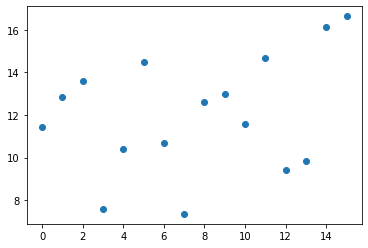

In [54]:
x = range(0,N) # from the first collected obs to the last in order
y = eij[order] # assign run order (see the previous code box)

plt.scatter(x, y)

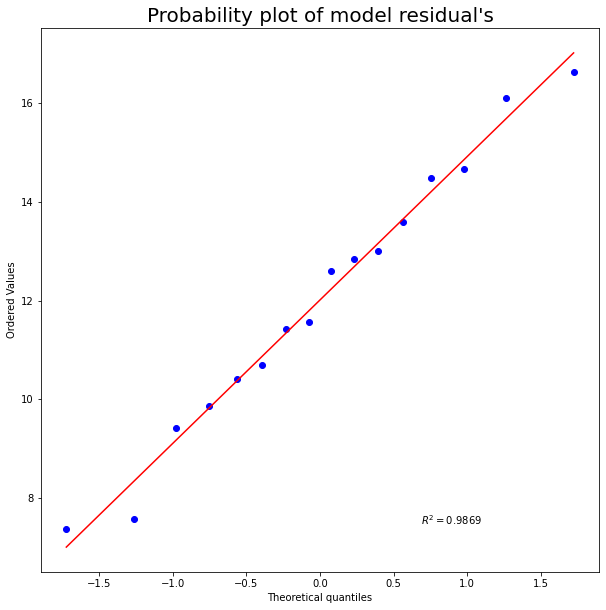

In [55]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [72]:
stats.levene(df['I'][df['A'] == -1],
             df['I'][df['A'] == 1])

LeveneResult(statistic=2.2650612147047786, pvalue=0.15454517686404468)

In [71]:
stats.levene(df['I'][df['B'] == -1],
             df['I'][df['B'] == 1])

LeveneResult(statistic=0.6091409769902896, pvalue=0.44810729736431776)

In [56]:
stats.levene(df['I'][df['C'] == -1],
             df['I'][df['C'] == 1])

LeveneResult(statistic=0.5125999419456193, pvalue=0.4857869048570277)

In [73]:
stats.levene(df['I'][df['D'] == -1],
             df['I'][df['D'] == 1])

LeveneResult(statistic=0.07653780508626201, pvalue=0.7860877874969061)

In [57]:
X = df[['C']]
X

,C
0,-1
1,-1
2,-1
3,-1
4,1
5,1
6,1
7,1
8,-1
9,-1


In [58]:
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      I   R-squared (uncentered):                   0.018
Model:                            OLS   Adj. R-squared (uncentered):             -0.047
Method:                 Least Squares   F-statistic:                             0.2770
Date:                Fri, 14 Oct 2022   Prob (F-statistic):                       0.606
Time:                        11:37:56   Log-Likelihood:                         -63.240
No. Observations:                  16   AIC:                                      128.5
Df Residuals:                      15   BIC:                                      129.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [59]:
Y=df[['C']]
regr=LinearRegression()
regr.fit(X,Y)
Yhat=regr.predict(X)
Yhat

array([[-1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.]])

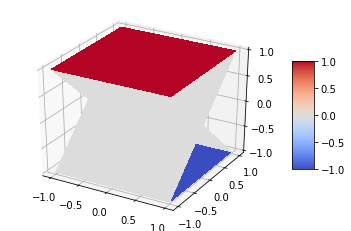

In [60]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=df['A']
x2=df['B']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [61]:
aa=df[['A']].to_numpy()
bb=df[['B']].to_numpy()
cc=df[['C']].to_numpy()
AB=aa*bb
AC=aa*cc
BC=bb*cc
AB, AC, BC

(array([[ 1],
        [-1],
        [-1],
        [ 1],
        [ 1],
        [-1],
        [-1],
        [ 1],
        [ 1],
        [-1],
        [-1],
        [ 1],
        [ 1],
        [-1],
        [-1],
        [ 1]]), array([[ 1],
        [-1],
        [ 1],
        [-1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [-1],
        [ 1],
        [-1],
        [ 1]]), array([[ 1],
        [ 1],
        [-1],
        [-1],
        [-1],
        [-1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [-1],
        [-1],
        [-1],
        [-1],
        [ 1],
        [ 1]]))

In [62]:
df['AB']=AB
df['AC']=AC
df['BC']=BC
X=df[['A', 'B', 'C', 'AB', 'AC', 'BC']]
X = sm.add_constant(X) # adding a constant
X

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,A,B,C,AB,AC,BC
0,1.0,-1,-1,-1,1,1,1
1,1.0,1,-1,-1,-1,-1,1
2,1.0,-1,1,-1,-1,1,-1
3,1.0,1,1,-1,1,-1,-1
4,1.0,-1,-1,1,1,-1,-1
5,1.0,1,-1,1,-1,1,-1
6,1.0,-1,1,1,-1,-1,1
7,1.0,1,1,1,1,1,1
8,1.0,-1,-1,-1,1,1,1
9,1.0,1,-1,-1,-1,-1,1


In [63]:
X = df[['AB']]

In [64]:
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      C   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.067
Method:                 Least Squares   F-statistic:                              0.000
Date:                Fri, 14 Oct 2022   Prob (F-statistic):                        1.00
Time:                        11:38:06   Log-Likelihood:                         -22.703
No. Observations:                  16   AIC:                                      47.41
Df Residuals:                      15   BIC:                                      48.18
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [65]:
Y=df[['AB']]
regr=LinearRegression()
regr.fit(X,Y)
Yhat=regr.predict(X)
Yhat

array([[ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.]])

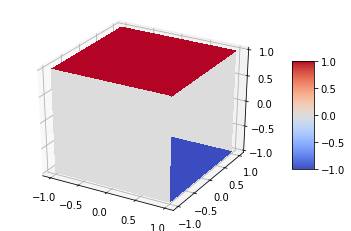

In [70]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=df['A']
x2=df['B']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [29]:
res.resid

0      6.042687
1     15.701313
2     12.629313
3     16.278688
4      9.408687
5      5.362313
6     10.354313
7     12.445687
8      7.566687
9     17.861313
10    14.870313
11    18.829688
12    10.851687
13     7.119313
14    12.184313
15    14.658687
dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


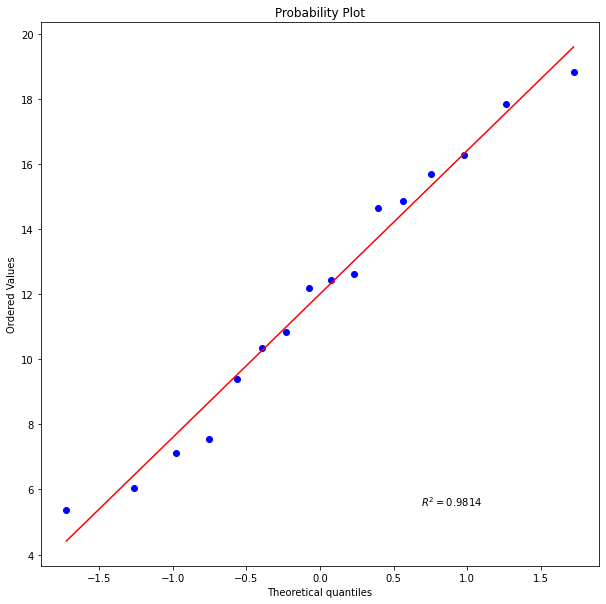

In [30]:
ig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [69]:
# ??

ydata0=[706, 764,780,761]
mse=statistics.variance(ydata0)
print(mse)

1040.9166666666667


In [70]:
from statistics import variance
Ycenter=[df['I'][df['A']==0]]
#Ydata0=np.array(Ycenter)
#Yrow=Ydata0[0]
Yrow=np.array(Ycenter)[0]
#MSpe=statistics.variance(Yrow) somehow the output is integer
MSpe=np.var(Yrow, ddof=1) # ddof = 0 gives biased estimator
MSpe

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3724: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [78]:
len(YF)

16

In [79]:
beta=regr2.coef_
betas=beta.flatten()
betas

array([1.5218125, 0.9824375, 0.1026875])

In [80]:
Y=df[['I']].to_numpy()
SST = sum(Y**2) - (sum(Y))**2/len(Y)

# all SS terms of main and 2-way interactions summed for SSR
SSR=sum(betas[0:10]**2) * len(YF)
DFm= 4
DFR = DFm + comb(DFm, 2) 
print("SS Model (reduce model 1)", SSR, "DF=", int(DFR))
SSe=SST-SSR
DFe = len(Y)-1 - DFR
print("SS Residual",SSe, "DF=", int(DFe))
SSpe = MSpe * (len(Yrow)-1)
SSlof = SSe - SSpe
DFlof=int(DFe - (len(YC)-1))
print('    SS lack of fit', SSlof, "DF=", DFlof)
print("    SS pure error", SSpe, "DF=", len(YC)-1)

print("SS Total", SST, "DF=", len(Y)-1)

SS Model (reduce model 1) 52.6662631875001 DF= 10
SS Residual [225.85865225] DF= 5
    SS lack of fit [nan] DF= 6
    SS pure error nan DF= -1
SS Total [278.52491544] DF= 15


In [82]:
# Lack of Fit test: F0= MSlof/MSpe
from scipy.stats import f
MSlof=(SSlof/DFlof)
MSpe=(SSpe/(len(YC)-1))
F0=MSlof/MSpe
print("MSlof, MSpe, F0", MSlof, MSpe, F0)
pval=1-f.cdf(F0, DFlof, len(YC)-1)
print("pvalue of F0=", pval)

MSlof, MSpe, F0 [nan] nan [nan]
pvalue of F0= [nan]
